In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("31-Car_Price_Prediction.csv")

In [3]:
df.head()

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,Honda,Model B,2015,3.9,74176,Petrol,Manual,30246.207931
1,Ford,Model C,2014,1.7,94799,Electric,Automatic,22785.747684
2,BMW,Model B,2006,4.1,98385,Electric,Manual,25760.290347
3,Honda,Model B,2015,2.6,88919,Electric,Automatic,25638.003491
4,Honda,Model C,2004,3.4,138482,Petrol,Automatic,21021.386657


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make          1000 non-null   object 
 1   Model         1000 non-null   object 
 2   Year          1000 non-null   int64  
 3   Engine Size   1000 non-null   float64
 4   Mileage       1000 non-null   int64  
 5   Fuel Type     1000 non-null   object 
 6   Transmission  1000 non-null   object 
 7   Price         1000 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


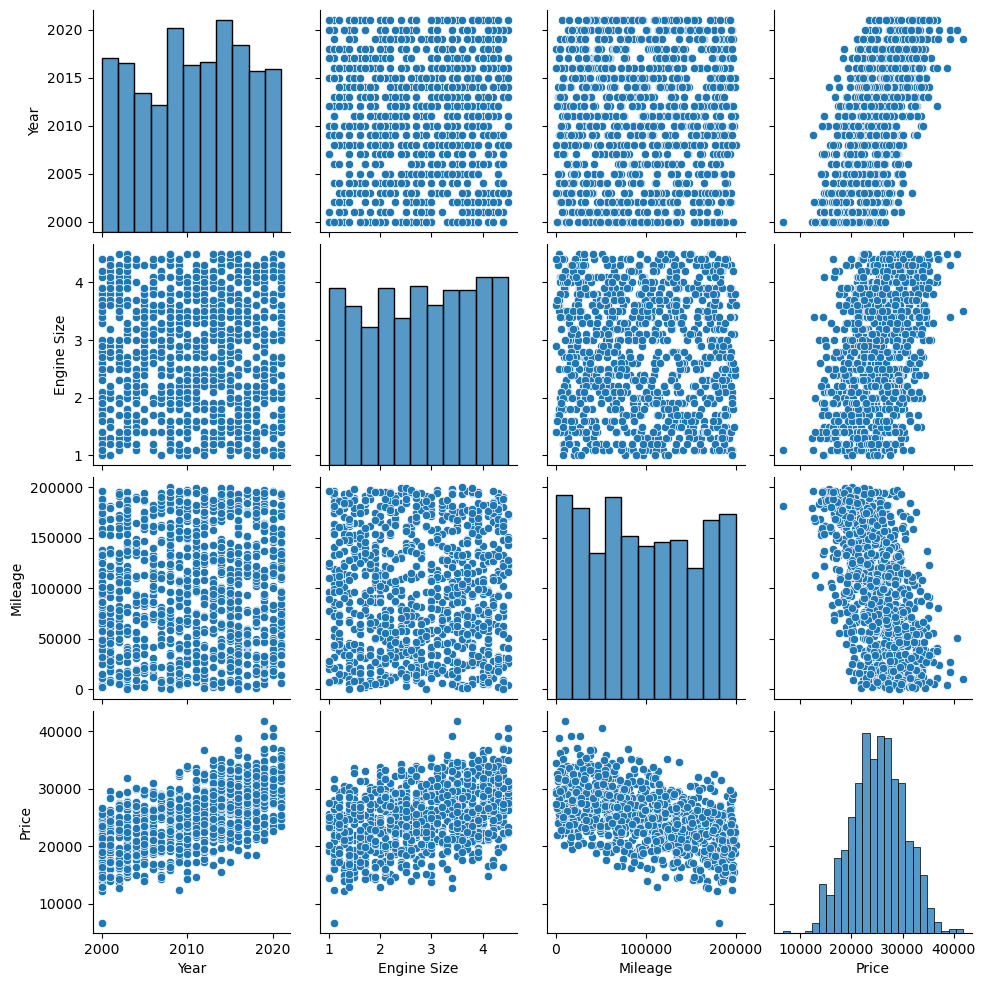

In [5]:
sns.pairplot(df)
plt.show()

In [6]:
df.Make.value_counts()

Make
Ford      225
Audi      212
Honda     198
Toyota    187
BMW       178
Name: count, dtype: int64

In [7]:
df.Model.value_counts()

Model
Model B    212
Model C    205
Model A    202
Model D    197
Model E    184
Name: count, dtype: int64

In [9]:
df['Engine Size'].unique()

array([3.9, 1.7, 4.1, 2.6, 3.4, 2.7, 1.3, 2. , 4.4, 2.1, 4.5, 4. , 3.1,
       1.1, 4.2, 3. , 2.2, 1.5, 2.9, 1. , 1.2, 3.5, 1.9, 3.8, 4.3, 1.6,
       2.8, 2.4, 1.8, 3.7, 3.6, 3.3, 2.5, 2.3, 1.4, 3.2])

In [10]:
df['Fuel Type'].unique()

array(['Petrol', 'Electric', 'Diesel'], dtype=object)

In [11]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [12]:
df.duplicated().sum()

0

In [17]:
df = pd.get_dummies(df, columns=['Model','Make', 'Fuel Type', 'Transmission'], dtype=int)

In [18]:
df.head()

,Year,Engine Size,Mileage,Price,Model_Model A,Model_Model B,Model_Model C,Model_Model D,Model_Model E,Make_Audi,Make_BMW,Make_Ford,Make_Honda,Make_Toyota,Fuel Type_Diesel,Fuel Type_Electric,Fuel Type_Petrol,Transmission_Automatic,Transmission_Manual
0,2015,3.9,74176,30246.207931,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
1,2014,1.7,94799,22785.747684,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
2,2006,4.1,98385,25760.290347,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1
3,2015,2.6,88919,25638.003491,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0
4,2004,3.4,138482,21021.386657,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    1000 non-null   int64  
 1   Engine Size             1000 non-null   float64
 2   Mileage                 1000 non-null   int64  
 3   Price                   1000 non-null   float64
 4   Model_Model A           1000 non-null   int32  
 5   Model_Model B           1000 non-null   int32  
 6   Model_Model C           1000 non-null   int32  
 7   Model_Model D           1000 non-null   int32  
 8   Model_Model E           1000 non-null   int32  
 9   Make_Audi               1000 non-null   int32  
 10  Make_BMW                1000 non-null   int32  
 11  Make_Ford               1000 non-null   int32  
 12  Make_Honda              1000 non-null   int32  
 13  Make_Toyota             1000 non-null   int32  
 14  Fuel Type_Diesel        1000 non-null   i

In [20]:
X = df.drop('Price', axis=1)
y = df.Price

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=36)

In [25]:
df.describe()

,Year,Engine Size,Mileage,Price,Model_Model A,Model_Model B,Model_Model C,Model_Model D,Model_Model E,Make_Audi,Make_BMW,Make_Ford,Make_Honda,Make_Toyota,Fuel Type_Diesel,Fuel Type_Electric,Fuel Type_Petrol,Transmission_Automatic,Transmission_Manual
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2010.688000,2.798300,97192.48700,25136.615530,0.202000,0.212000,0.205000,0.197000,0.184000,0.212000,0.178000,0.225000,0.198000,0.187000,0.344000,0.325000,0.331000,0.489000,0.511000
std,6.288577,1.024137,59447.31576,5181.401368,0.401693,0.408929,0.403904,0.397931,0.387678,0.408929,0.382704,0.417791,0.398692,0.390107,0.475279,0.468609,0.470809,0.500129,0.500129
min,2000.000000,1.000000,56.00000,6704.953524,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2005.000000,1.900000,44768.75000,21587.878370,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2011.000000,2.800000,94411.50000,25189.325247,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2016.000000,3.700000,148977.75000,28806.368974,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,2021.000000,4.500000,199867.00000,41780.504635,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [28]:
# Linear Regression
linear = LinearRegression()
linear.fit(X_train_scaled,y_train)

LinearRegression()

R2: 0.8182445635883293
Mean Squared Error : 4599357.926966642
Mean Absolute Error: 1716.2777933506802


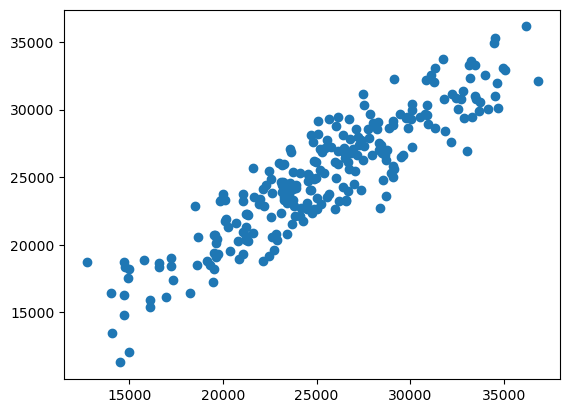

In [32]:
y_pred = linear.predict(X_test_scaled)
print("R2:",r2_score(y_test, y_pred))
print("Mean Squared Error :", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
plt.scatter(y_test, y_pred)
plt.show()

In [33]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

R2: 0.8155020654276907
Mean Squared Error : 4668757.395306367
Mean Absolute Error: 1732.5704675601526


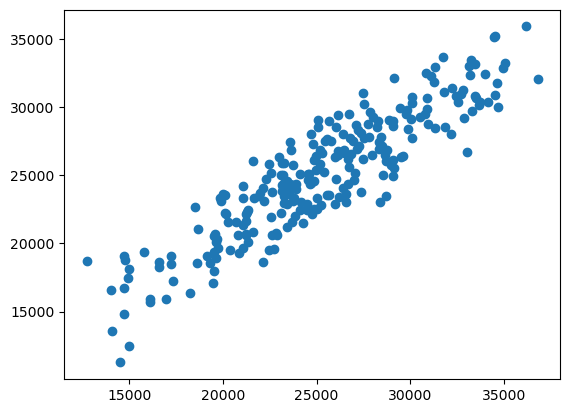

In [34]:
# Ridge Regression
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred = ridgecv.predict(X_test_scaled)
print("R2:",r2_score(y_test, y_pred))
print("Mean Squared Error :", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
plt.scatter(y_test, y_pred)
plt.show()

R2: 0.8189904787802742
Mean Squared Error : 4580482.392794745
Mean Absolute Error: 1712.2216308777304


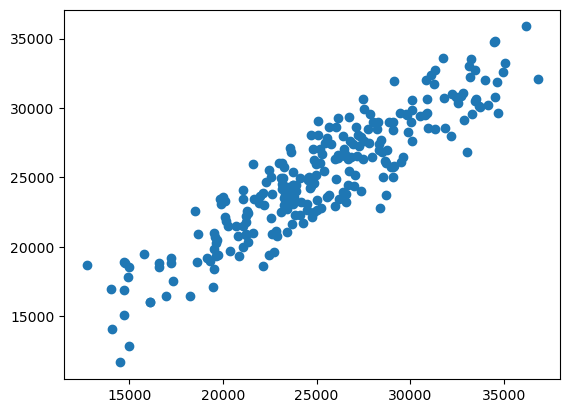

In [35]:
# Lasso Regression
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)
y_pred = lassocv.predict(X_test_scaled)
print("R2:",r2_score(y_test, y_pred))
print("Mean Squared Error :", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
plt.scatter(y_test, y_pred)
plt.show()

R2: 0.3311593337714823
Mean Squared Error : 16925147.77455237
Mean Absolute Error: 3276.030733145864


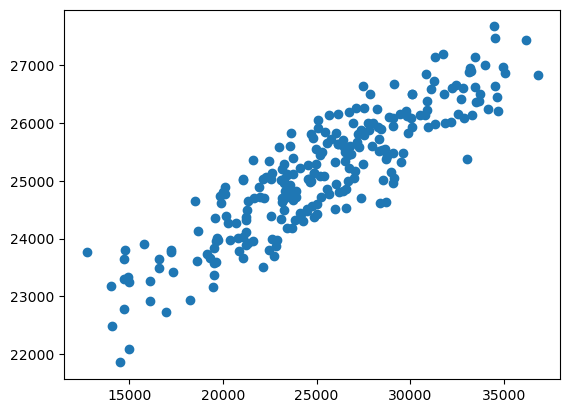

In [36]:
# Elasticnet Regression
elasticCV = ElasticNetCV(cv=5)
elasticCV.fit(X_train_scaled,y_train)
y_pred = elasticCV.predict(X_test_scaled)
print("R2:",r2_score(y_test, y_pred))
print("Mean Squared Error :", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
plt.scatter(y_test, y_pred)
plt.show()

In [38]:
#SVM Regressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [39]:
param_grid = {
    'kernel' : ['linear', 'poly', 'rbf'],
    'gamma' : ['scale', 'auto'],
    'C' : [100, 10, 1, 0.1]
}

cv = StratifiedKFold()

In [42]:
svmgrid = GridSearchCV(estimator=SVR(), param_grid=param_grid, cv=5, refit=True, verbose=3)

In [43]:
svmgrid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END .C=100, gamma=scale, kernel=linear;, score=0.856 total time=   0.0s
[CV 2/5] END .C=100, gamma=scale, kernel=linear;, score=0.821 total time=   0.0s
[CV 3/5] END .C=100, gamma=scale, kernel=linear;, score=0.822 total time=   0.0s
[CV 4/5] END .C=100, gamma=scale, kernel=linear;, score=0.838 total time=   0.0s
[CV 5/5] END .C=100, gamma=scale, kernel=linear;, score=0.840 total time=   0.0s
[CV 1/5] END ...C=100, gamma=scale, kernel=poly;, score=0.170 total time=   0.0s
[CV 2/5] END ...C=100, gamma=scale, kernel=poly;, score=0.171 total time=   0.0s
[CV 3/5] END ...C=100, gamma=scale, kernel=poly;, score=0.156 total time=   0.0s
[CV 4/5] END ...C=100, gamma=scale, kernel=poly;, score=0.151 total time=   0.0s
[CV 5/5] END ...C=100, gamma=scale, kernel=poly;, score=0.136 total time=   0.0s
[CV 1/5] END ....C=100, gamma=scale, kernel=rbf;, score=0.228 total time=   0.0s
[CV 2/5] END ....C=100, gamma=scale, kernel=rbf

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [100, 10, 1, 0.1], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']},
             verbose=3)

R2: 0.8099306937617792
Mean Squared Error : 4809742.077479221
Mean Absolute Error: 1756.5981377241712


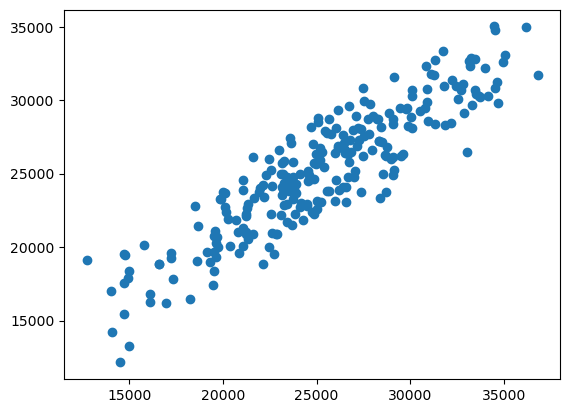

In [44]:
y_pred = svmgrid.predict(X_test_scaled)
print("R2:",r2_score(y_test, y_pred))
print("Mean Squared Error :", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
plt.scatter(y_test, y_pred)
plt.show()

In [45]:
# KNN Regression
from sklearn.neighbors import KNeighborsRegressor

In [46]:
param_grid = {
    'n_neighbors' : [3,5,7,10,15,20,25],
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
}

In [49]:
knngrid = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=param_grid, refit=True, verbose=3, cv=5)

In [50]:
knngrid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 56 candidates, totalling 280 fits
[CV 1/5] END algorithm=auto, n_neighbors=3, weights=uniform;, score=0.303 total time=   0.3s
[CV 2/5] END algorithm=auto, n_neighbors=3, weights=uniform;, score=0.299 total time=   0.0s
[CV 3/5] END algorithm=auto, n_neighbors=3, weights=uniform;, score=0.223 total time=   0.0s
[CV 4/5] END algorithm=auto, n_neighbors=3, weights=uniform;, score=0.145 total time=   0.0s
[CV 5/5] END algorithm=auto, n_neighbors=3, weights=uniform;, score=0.172 total time=   0.0s
[CV 1/5] END algorithm=auto, n_neighbors=3, weights=distance;, score=0.367 total time=   0.0s
[CV 2/5] END algorithm=auto, n_neighbors=3, weights=distance;, score=0.339 total time=   0.0s
[CV 3/5] END algorithm=auto, n_neighbors=3, weights=distance;, score=0.241 total time=   0.0s
[CV 4/5] END algorithm=auto, n_neighbors=3, weights=distance;, score=0.221 total time=   0.0s
[CV 5/5] END algorithm=auto, n_neighbors=3, weights=distance;, score=0.249 total time=   0.0s
[CV

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 10, 15, 20, 25],
                         'weights': ['uniform', 'distance']},
             verbose=3)

R2: 0.4591479357023187
Mean Squared Error : 13686370.42365839
Mean Absolute Error: 2954.045639494297


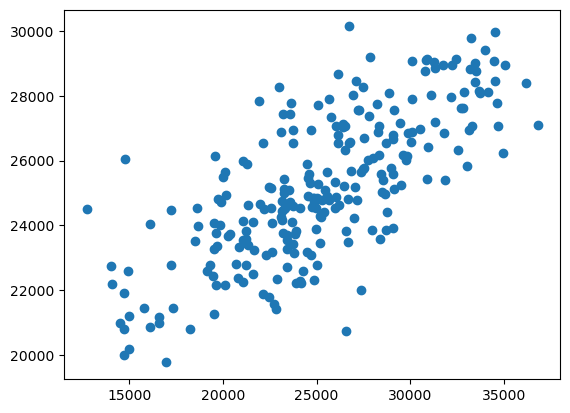

In [51]:
y_pred = knngrid.predict(X_test_scaled)
print("R2:",r2_score(y_test, y_pred))
print("Mean Squared Error :", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
plt.scatter(y_test, y_pred)
plt.show()

In [52]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [53]:
param_grid = {
    'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth' : [3,5,7,10,12,15,18,20,25,30,35,40, None],
    'max_features' : ['sqrt', 'log2']
}

In [54]:
treegrid = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=param_grid, refit=True)
treegrid.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [3, 5, 7, 10, 12, 15, 18, 20, 25, 30, 35,
                                       40, None],
                         'max_features': ['sqrt', 'log2']})

R2: 0.4231180116042711
Mean Squared Error : 14598114.909985738
Mean Absolute Error: 3054.6456284782917


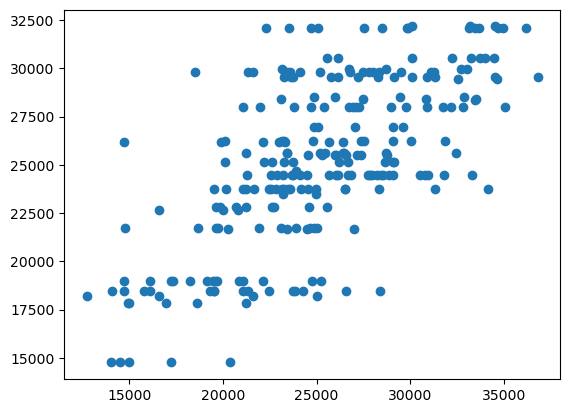

In [55]:
y_pred = treegrid.predict(X_test)
print("R2:",r2_score(y_test, y_pred))
print("Mean Squared Error :", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
plt.scatter(y_test, y_pred)
plt.show()